In [1]:
#Importing Libraries
from Plots import *
import matplotlib.pyplot as plt
import time 
from scipy.interpolate import interp1d

# Spectral Split

In [2]:
from ODE_Isotropic_Spectrum import *

nu_types=['nu_e','nu_x']
r_i,r_f=0,500 #km
E_i,E_f=1,50
E_step=0.5

# mass_ord="IH"
#Initial spectrum [Name, Mean energy [MeV], Relative Flux]
scenarios=[["Accreation Energy Hierarchy",np.array([11,16,25,25]),[1,1*11/16,1*11/25,1*11/25],"IH"],
          ["Accreation No Energy Hierarchy",np.array([13,16,17,17]),[1,1*13/16,1*13/17,1*13/17],"IH"],
          ["Cooling",np.array([13,16,17,17]),[0.85,0.75,1,1],"IH"]]

In [3]:
E_vec=[]
nu_e_time,nubar_e_time,nu_x_time,nubar_x_time=[],[],[],[]
Pee_time,Peebar_time=[],[]
mu_0=[]
for scenario in scenarios:
#     print(scenario)
    start_time = time.time()
    E_vec_aux,r_vec_aux,mu_0_aux,nu_e_time_aux,nubar_e_time_aux,nu_x_time_aux,nubar_x_time_aux,nu_aux,nubar_aux=solver_two_families(nu_types,r_i,r_f,E_i,E_f,E_step,scenario[1],scenario[2],scenario[3])
    print("Took %s minutes" % ((time.time() - start_time)/60))
    #Flux
    E_vec.append(E_vec_aux)
    nu_e_time.append(nu_e_time_aux)
    nubar_e_time.append(nubar_e_time_aux)
    nu_x_time.append(nu_x_time_aux)
    nubar_x_time.append(nubar_x_time_aux)
    mu_0.append(mu_0_aux)
    #Pee
    Pee_time_aux,Peebar_time_aux=read_two_flavor_Probability(nu_aux,nubar_aux)
    Pee_time.append(Pee_time_aux)
    Peebar_time.append(Peebar_time_aux)

Took 4.42977128426234 minutes
Took 4.034697302182516 minutes
Took 4.008395604292551 minutes


## Plots

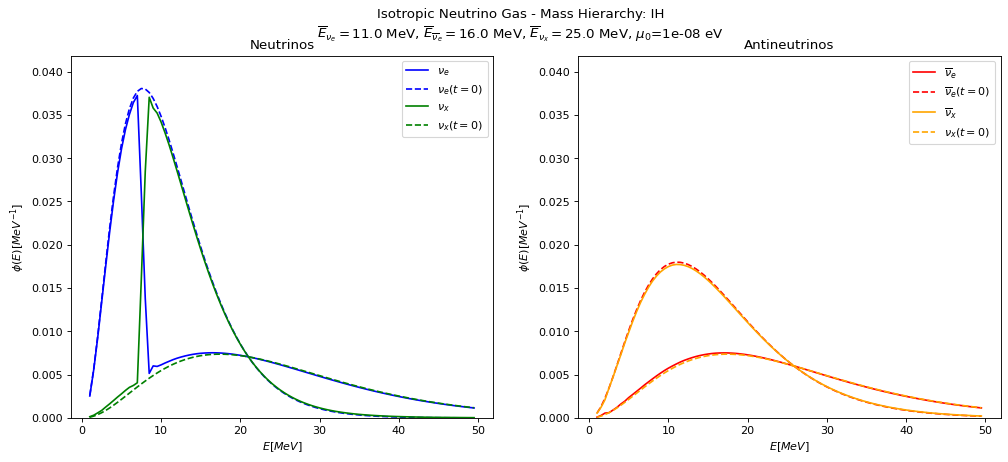

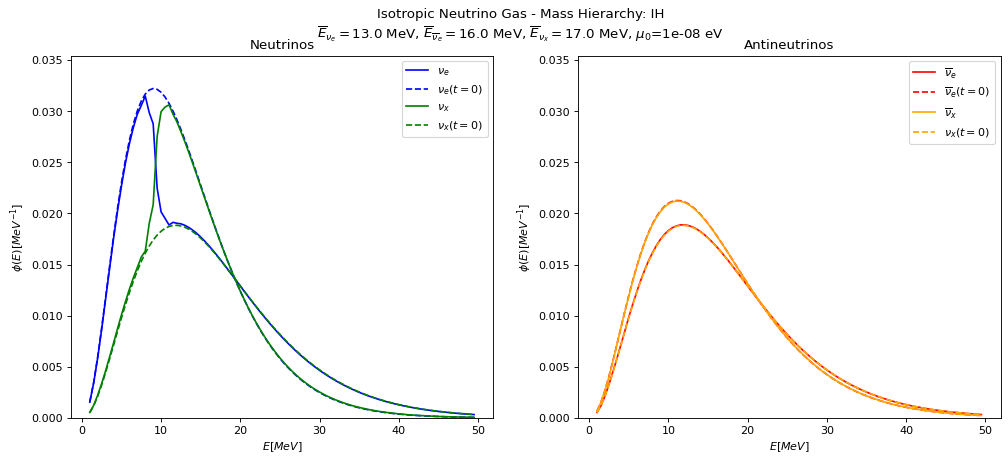

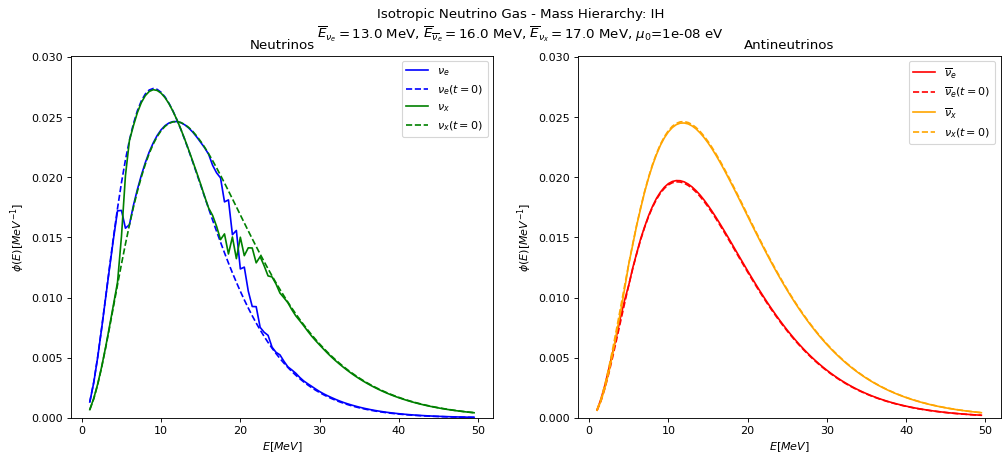

In [4]:
for i in range(len(scenarios)):
    Plot_Spectrum(E_vec[i],scenarios[i][1],mu_0[i],nu_e_time[i],nubar_e_time[i], nu_x_time[i],nubar_x_time[i],scenarios[i][3])


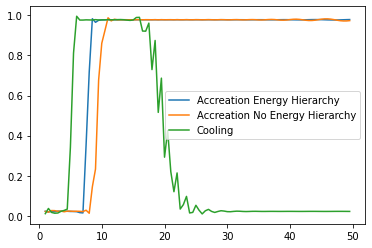

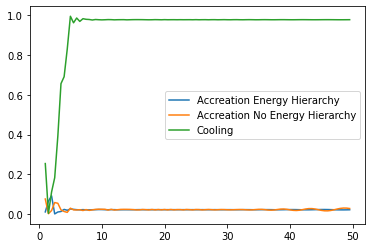

In [8]:
for i in range(len(scenarios)):
    plt.plot(E_vec[i],1-np.array(Pee_time[i][-1]),label=scenarios[i][0])
plt.legend()
plt.show()

for i in range(len(scenarios)):
    plt.plot(E_vec[i],np.array(Peebar_time[i][-1]),label=scenarios[i][0])
plt.legend()

## Saving Data

In [9]:
for i in range(len(scenarios)):
    np.savetxt('Output/Pee_%s.csv'%(scenarios[i][0]),X=np.c_[E_vec[i],1-np.array(Pee_time[i][-1]),np.array(Peebar_time[i][-1])]
               , header='#E [MeV], Pee, Peebar',delimiter=',',
               comments='#Electron Neutrino Suvival Probability Scenario: %s \n'%(scenarios[i][0]))

## Loading Data

In [120]:
Pee_func=[]
for i in range(len(scenarios)):
    E_aux,Pee_aux,Peebar_aux=np.loadtxt('Output/Pee_%s.csv'%(scenarios[i][0]),delimiter=',', unpack=True)
    Pee_func.append(interp1d(E_aux,Pee_aux,bounds_error=False,fill_value='extrapolate'))

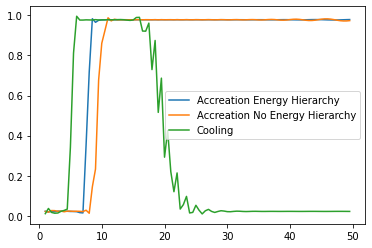

In [121]:
for i in range(len(scenarios)):
    plt.plot(E_vec[i],Pee_func[i](E_vec[i]),label=scenarios[i][0])
plt.legend()